https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
1. The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
2. Each point is closer to its own cluster center than to other cluster centers.

The expectation–maximization approach here consists of the following procedure:
1. Guess some cluster centers
2. Repeat until converged
   1. E-Step: assign points to the nearest cluster center. It involves updating our expectation of which cluster each point belongs to.
   2. M-Step: set the cluster centers to the mean.It involves maximizing some fitness function (simple mean of the data in each cluster) that defines the location of the cluster centers.
   
k-means is limited to linear cluster boundaries

In [1]:
# Importing helpful package to load and hadle our data
import pandas as pd
import numpy as np

# import package for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Inline Priting of Visualizations
sns.set()
%matplotlib inline

# flexible and easy-to-use missing data visualizations
import missingno as msno

#  Import SK-Learn Library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("hack_data.csv")
df.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed,hack
0,8.0,391.09,1,2.96,7.0,Slovenia,72.37,1
1,20.0,720.99,0,3.04,9.0,British Virgin Islands,69.08,1
2,31.0,356.32,1,3.71,8.0,Tokelau,70.58,1
3,2.0,228.08,1,2.48,8.0,Bolivia,70.80,1
4,20.0,408.50,0,3.57,8.0,Iraq,71.28,1


In [3]:
# dropping location
df.drop('Location',inplace=True,axis =1)
hack_output = df['hack']
hack_output.sample(5)

50     1
104    1
43     1
186    0
298    0
Name: hack, dtype: int64

In [4]:
df.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed,hack
0,8.0,391.09,1,2.96,7.0,72.37,1
1,20.0,720.99,0,3.04,9.0,69.08,1
2,31.0,356.32,1,3.71,8.0,70.58,1
3,2.0,228.08,1,2.48,8.0,70.80,1
4,20.0,408.50,0,3.57,8.0,71.28,1


Text(0, 0.5, 'hack')

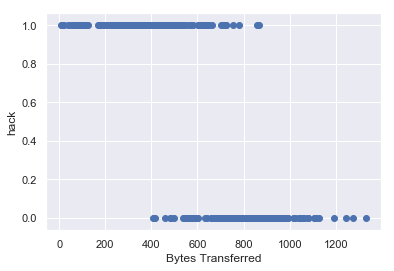

In [5]:
# Relation between  byte transferred and hack
plt.scatter(df['Bytes Transferred'],df['hack'])
plt.xlabel('Bytes Transferred')
plt.ylabel('hack')

Relation between byte transferred and hack seems to be in binary form as we have two only two cluster one at 0 and other at 
1

Text(0, 0.5, 'hack')

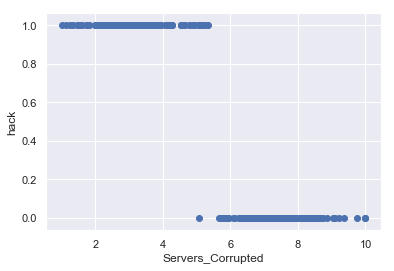

In [6]:
# relation between server_corrupted and hack
plt.scatter(df['Servers_Corrupted'],df['hack'])
plt.xlabel('Servers_Corrupted')
plt.ylabel('hack')

Relation between server_corrupted and hack seems to be in binary form as we have two only two cluster one at 0 and other at 
1

Text(0, 0.5, 'hack')

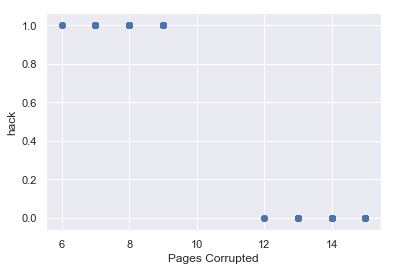

In [7]:
# relation between page corrupted and hack
plt.scatter(df['Pages_Corrupted'],df['hack'])
plt.xlabel('Pages Corrupted')
plt.ylabel('hack')

Relation between page corrupted and hack seems to be in binary form as we have two only two cluster one at 0 and other at 1

Text(0, 0.5, 'hack')

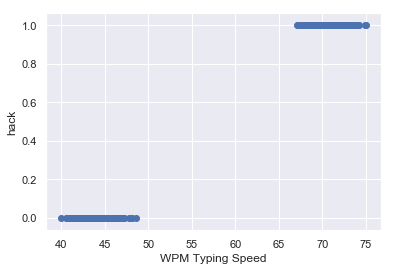

In [8]:
# relation between WPM_Typing_Speed and hack
plt.scatter(df['WPM_Typing_Speed'],df['hack'])
plt.xlabel('WPM Typing Speed')
plt.ylabel('hack')

Relation between WPM_Typing_Speed and hack seems to be in binary form as we have two only two cluster one at 0 and other at 1

It seems that we will have only two cluster as most all feature are giving two cluster wrt to hack(our output feature). But we can use elbow plot to check our own prediction

In [9]:
# dropping output label = hack
df.drop('hack',inplace=True,axis =1)

Elbow Plot

In [10]:
sum_of_sqr_err = []
kmean_rng = range(1,10)
for k in kmean_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sum_of_sqr_err.append(km.inertia_)

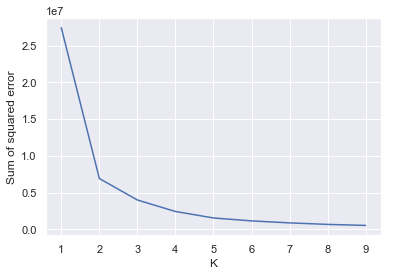

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kmean_rng,sum_of_sqr_err)

We will take k = 2 as getting elbow at 2

Preprocessing using standard scaler, as all column has data of different diemensions

In [12]:
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(df[['Session_Connection_Time','Bytes Transferred','Kali_Trace_Used','Servers_Corrupted','Pages_Corrupted','WPM_Typing_Speed']]),
                           columns=['Session_Connection_Time','Bytes Transferred','Kali_Trace_Used','Servers_Corrupted','Pages_Corrupted','WPM_Typing_Speed'],
                           index=df.index)

In [13]:
numericals.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
0,-1.564572,-0.756034,0.976328,-1.000019,-1.254790,1.122219
1,-0.711517,0.397838,-1.024246,-0.965213,-0.600968,0.876531
2,0.070449,-0.877647,0.976328,-0.673714,-0.927879,0.988547
3,-1.991099,-1.326184,0.976328,-1.208855,-0.927879,1.004976
4,-0.711517,-0.695140,-1.024246,-0.734624,-0.927879,1.040821


In [14]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [15]:
#cluster_centers_ is  array, [n_clusters, n_features] Coordinates of cluster centers.
km.cluster_centers_

array([[2.03742690e+01, 3.65678772e+02, 4.91228070e-01, 3.65023392e+00,
        8.54385965e+00, 6.74745029e+01],
       [4.01165644e+01, 8.60667791e+02, 5.33742331e-01, 6.94570552e+00,
        1.32453988e+01, 4.67130061e+01]])

In [16]:
print(confusion_matrix(hack_output,km.labels_))
print(classification_report(hack_output,km.labels_))

[[ 20 147]
 [151  16]]
              precision    recall  f1-score   support

           0       0.12      0.12      0.12       167
           1       0.10      0.10      0.10       167

   micro avg       0.11      0.11      0.11       334
   macro avg       0.11      0.11      0.11       334
weighted avg       0.11      0.11      0.11       334



In [17]:
# True Positive :  Observation is positive, and is predicted to be positive.
TP  = 147
#  False Negative (FN) : Observation is positive, but is predicted negative.
FN = 20
# True Negative (TN) : Observation is negative, and is predicted to be negative.
TN = 151
# False Positive (FP) : Observation is negative, but is predicted positive.
FP = 16
# total prediction
total = TP + FN + TN + FP
# total correct prediction
correct_pred = TP+TN

In [18]:
accuracy = (correct_pred/total) * 100
print(accuracy)

89.22155688622755


In [19]:
recall = (TP /(TP + FN) ) * 100
print(recall)

88.02395209580838


In [20]:
precision = (TP/(TP + FP)) * 100
print(precision)

90.1840490797546


In [21]:
'''Our recall and precision are almost comparable.But it is difficult to compare two models with low precision
and high recall or vice versa. So to make them comparable, we use F-Score.
F-score helps to measure Recall and Precision at the same time. 
It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.'''

fmeasure =( (2 * recall * precision) / (recall + precision))
print(fmeasure)

89.0909090909091
